<a href="https://colab.research.google.com/github/MDFIROZ1/Assignment_2/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

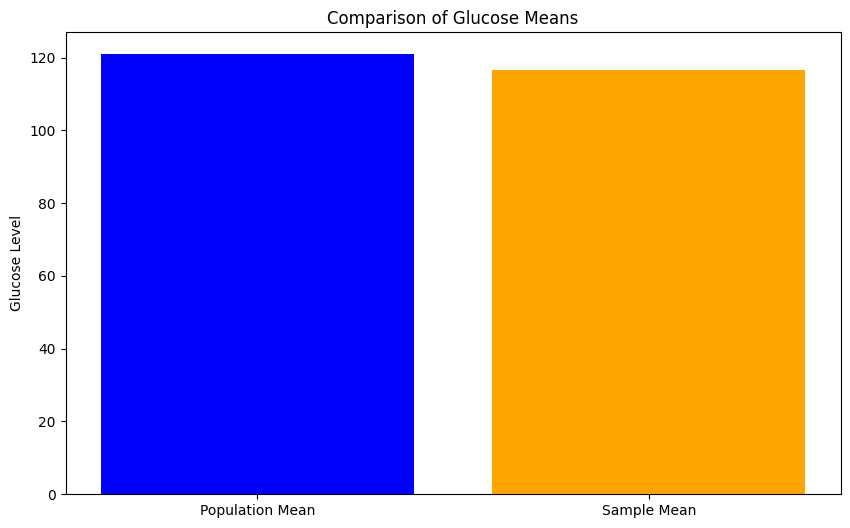

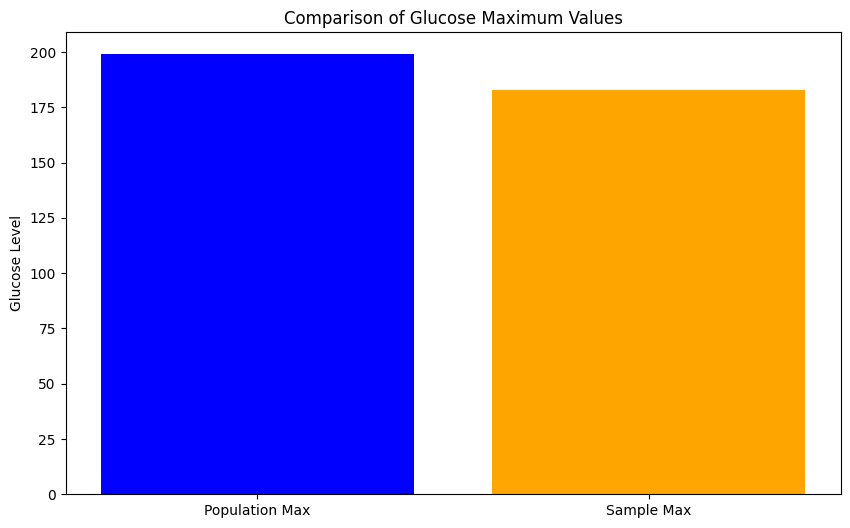

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
diabetes = pd.read_csv('diabetes.csv')

# Set seed for reproducibility
np.random.seed(42)

# Take random sample of 25 observations
sample_25 = diabetes.sample(n=25, random_state=42)

# Calculate statistics
pop_glucose_mean = diabetes['Glucose'].mean()
sample_glucose_mean = sample_25['Glucose'].mean()

pop_glucose_max = diabetes['Glucose'].max()
sample_glucose_max = sample_25['Glucose'].max()

# Create comparison chart
plt.figure(figsize=(10, 6))
plt.bar(['Population Mean', 'Sample Mean'], [pop_glucose_mean, sample_glucose_mean], color=['blue', 'orange'])
plt.title('Comparison of Glucose Means')
plt.ylabel('Glucose Level')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(['Population Max', 'Sample Max'], [pop_glucose_max, sample_glucose_max], color=['blue', 'orange'])
plt.title('Comparison of Glucose Maximum Values')
plt.ylabel('Glucose Level')
plt.show()

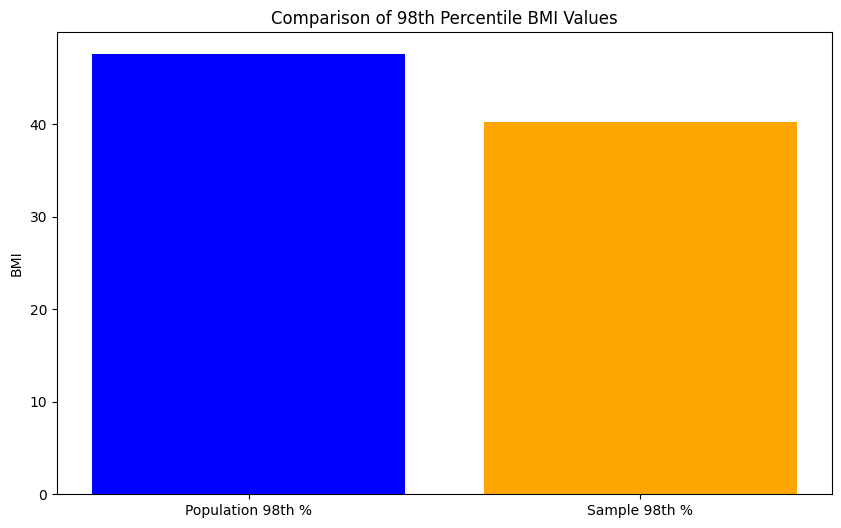

In [2]:
# Calculate 98th percentiles
pop_bmi_98 = np.percentile(diabetes['BMI'], 98)
sample_bmi_98 = np.percentile(sample_25['BMI'], 98)

# Create comparison chart
plt.figure(figsize=(10, 6))
plt.bar(['Population 98th %', 'Sample 98th %'], [pop_bmi_98, sample_bmi_98], color=['blue', 'orange'])
plt.title('Comparison of 98th Percentile BMI Values')
plt.ylabel('BMI')
plt.show()

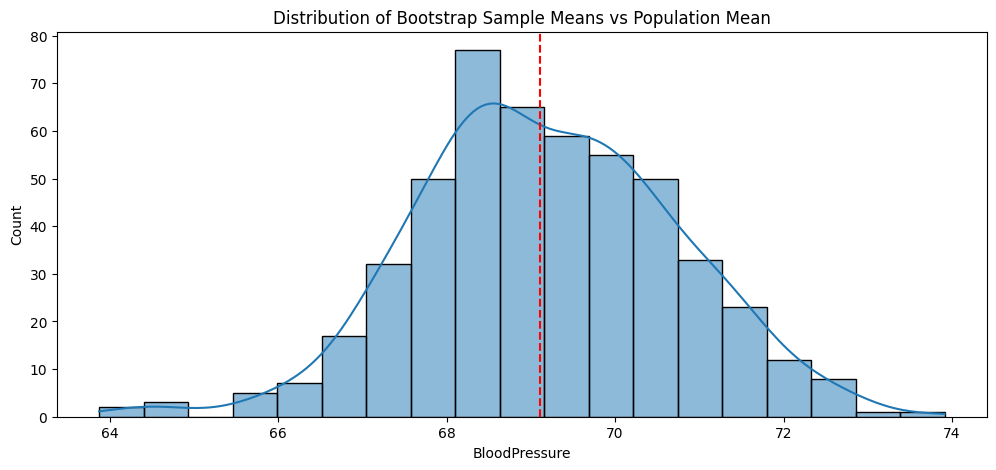

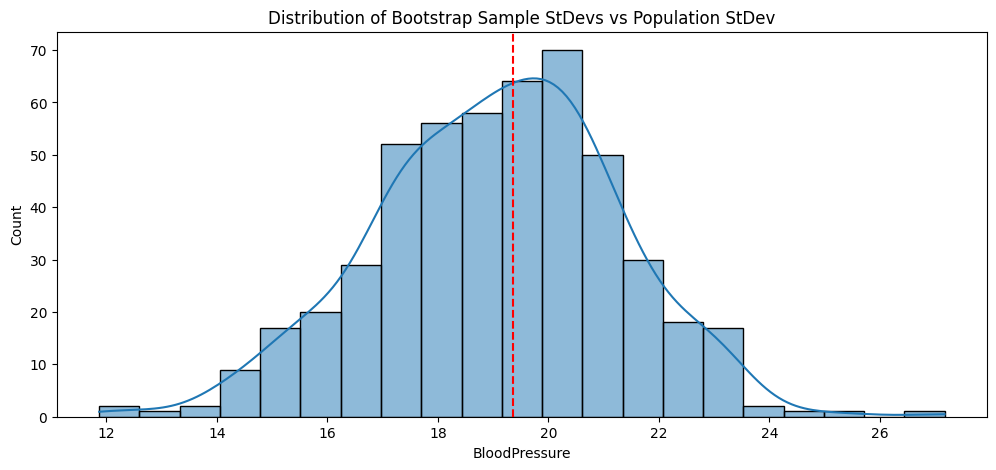

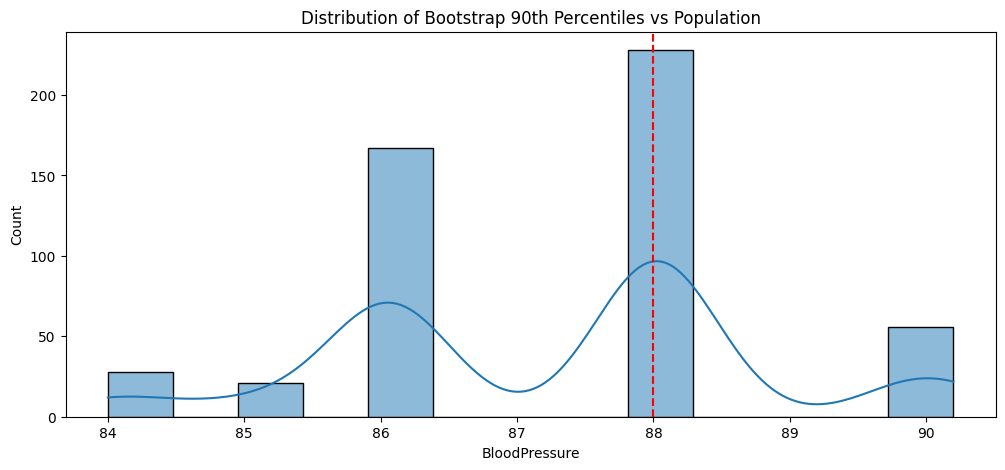

In [3]:
# Bootstrap sampling
bootstrap_means = []
bootstrap_stds = []
bootstrap_90percentiles = []

for _ in range(500):
    bootstrap_sample = diabetes['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_90percentiles.append(np.percentile(bootstrap_sample, 90))

# Population statistics
pop_bp_mean = diabetes['BloodPressure'].mean()
pop_bp_std = diabetes['BloodPressure'].std()
pop_bp_90 = np.percentile(diabetes['BloodPressure'], 90)

# Create comparison charts
plt.figure(figsize=(12, 5))
sns.histplot(bootstrap_means, kde=True)
plt.axvline(pop_bp_mean, color='red', linestyle='--')
plt.title('Distribution of Bootstrap Sample Means vs Population Mean')
plt.xlabel('BloodPressure')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(bootstrap_stds, kde=True)
plt.axvline(pop_bp_std, color='red', linestyle='--')
plt.title('Distribution of Bootstrap Sample StDevs vs Population StDev')
plt.xlabel('BloodPressure')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(bootstrap_90percentiles, kde=True)
plt.axvline(pop_bp_90, color='red', linestyle='--')
plt.title('Distribution of Bootstrap 90th Percentiles vs Population')
plt.xlabel('BloodPressure')
plt.show()

# Calculate average bootstrap statistics
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_90 = np.mean(bootstrap_90percentiles)